<a href="https://colab.research.google.com/github/abhi1628/ML_DA_Exp_using_Python/blob/main/6th_SEM_ML_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exp 1- Implement a Gaussian Probability Distribution Function (PDF) and Gaussian Cumulative Distribution Function (CDF) with a sample space of -5 to 5, mean zero and standard deviation 1. Use scipy module.

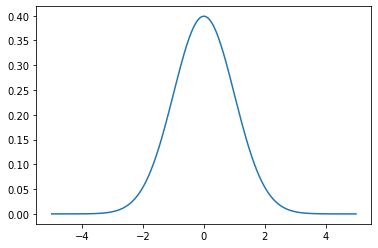

In [ ]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from scipy.stats import norm

sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
pdf = norm.pdf(sample_space, mean, stdev)
plt.plot(sample_space, pdf)
plt.show()

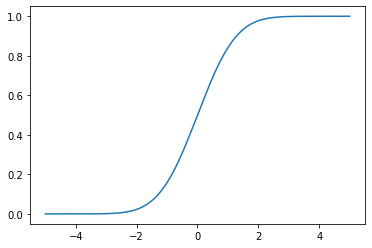

In [ ]:
sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0
cdf = norm.cdf(sample_space, mean, stdev)
plt.plot(sample_space, cdf)
plt.show()

## Exp 2- Implement a Chi- Squared Probability Distribution Function (PDF) and Chi- Squared Cumulative Distribution Function (CDF) with a sample space of 0 to 50, step size 0.01 and degree of freedom is 20. Use scipy module.

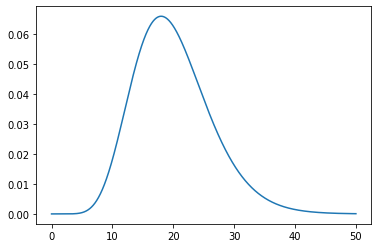

In [ ]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from scipy.stats import chi2

sample_space = arange(0, 50, 0.01)
dof = 20
pdf = chi2.pdf(sample_space, dof)
plt.plot(sample_space, pdf)
plt.show()

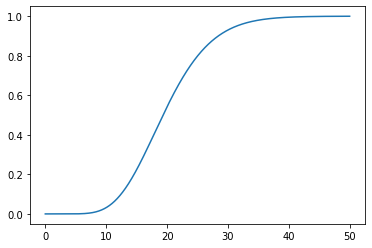

In [ ]:
sample_space = arange(0, 50, 0.01)
dof = 20
cdf = chi2.cdf(sample_space, dof)
plt.plot(sample_space, cdf)
plt.show()

## Exp 3- Implement a ML dataset having class imbalance using pandas and scikit-learn. Demonstrate how the class proportion can be preserved while splitting irrespective of the class imbalance?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.DataFrame({'feature':list(range(8)), 'target':['not fraud']*6 + ['fraud']*2})
X = df[['feature']]
y = df['target']
# Not Stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
y_train

3    not fraud
0    not fraud
5    not fraud
4    not fraud
Name: target, dtype: object

In [ ]:
y_test

6        fraud
2    not fraud
1    not fraud
7        fraud
Name: target, dtype: object

In [ ]:
# y_train contains NONE of the minority class, whereas y_test contains ALL of the minority class.

In [ ]:
# Stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)
y_train

1    not fraud
7        fraud
2    not fraud
4    not fraud
Name: target, dtype: object

In [ ]:
y_test

3    not fraud
6        fraud
0    not fraud
5    not fraud
Name: target, dtype: object

## Exp 4- Using a ML dataset in pandas and scikit-learn show that if cross-validation is used and the samples are not in an arbitrary order, shuffling may be required to get meaningful results.

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold

# set up the regression problem
X_reg, y_reg = load_diabetes(return_X_y=True)
reg = LinearRegression()
# set up the classification problem
df = pd.read_csv('http://bit.ly/kaggletrain')
X_clf = df[['Pclass', 'Fare', 'SibSp']]
y_clf = df['Survived']
clf = LogisticRegression()

In [ ]:
# Use KFold with regression problems:
kf = KFold(5, shuffle=True, random_state=1)
cross_val_score(reg, X_reg, y_reg, cv=kf, scoring='r2')

array([0.43843604, 0.38982527, 0.52792606, 0.47359858, 0.57449343])

In [ ]:
# Use StratifiedKFold with classification problems:
skf = StratifiedKFold(5, shuffle=True, random_state=1)
cross_val_score(clf, X_clf, y_clf, cv=skf, scoring='accuracy')

array([0.65363128, 0.7247191 , 0.66853933, 0.68539326, 0.65730337])

## Exp 5- Using a ML dataset in pandas and scikit-learn demonstrate pipeline slicing showing operation on some part of pipeline instead of the whole pipeline.

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
cols = ['Sex', 'Name', 'Age']
X = df[cols]
y = df['Survived']

In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['Sex']),
     ('vectorizer', CountVectorizer(), 'Name'),
     ('imputer', SimpleImputer(), ['Age'])])

In [ ]:
fs = SelectPercentile(chi2, percentile=50)

In [ ]:
clf = LogisticRegression(solver='liblinear', random_state=1)

In [ ]:
# create Pipeline
pipe = Pipeline([('preprocessor', ct), ('feature selector', fs), ('classifier', clf)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Sex']),
                                                 ('vectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('imputer', SimpleImputer(),
                                                  ['Age'])])),
                ('feature selector',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x7f99e89f5f80>)),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [ ]:
# access step 0 (preprocessor)
pipe[0].fit_transform(X)

<891x1512 sparse matrix of type '<class 'numpy.float64'>'
	with 5348 stored elements in Compressed Sparse Row format>

In [ ]:
# access steps 0 and 1 (preprocessor and feature selector)
pipe[0:2].fit_transform(X, y)

<891x756 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [ ]:
# access step 1 (feature selector)
pipe[1].get_support()

array([ True,  True,  True, ...,  True, False,  True])

## Exp 6- Create multiple models and ensemble them using VotingClassifier to improve the classifier’s accuracy.

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
cols = ['Pclass', 'Parch', 'SibSp', 'Fare']
X = df[cols]
y = df['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='liblinear', random_state=1)
cross_val_score(lr, X, y).mean()

0.6835791852363318

In [ ]:
rf = RandomForestClassifier(max_features=None, random_state=1)
cross_val_score(rf, X, y).mean()

0.6947774778733288

In [ ]:
# create an ensemble for improved accuracy
vc = VotingClassifier([('clf1', lr), ('clf2', rf)], voting='soft')
cross_val_score(vc, X, y).mean()

0.7251020023852865

## Exp 7- With a tree-based model having nominal (unordered) features implement OrdinalEncoder and demonstrate that OrdinalEncoder is faster than the OneHotEncoder and accuracy is also same.

In [ ]:
import pandas as pd
df = pd.read_csv('https://www.openml.org/data/get_csv/1595261/adult-census.csv')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
categorical_cols = ['workclass', 'education', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex']

In [ ]:
X = df[categorical_cols]
y = df['class']

In [ ]:
# OneHotEncoder creates 60 columns
ohe = OneHotEncoder()
ohe.fit_transform(X).shape

(48842, 60)

In [ ]:
# OrdinalEncoder creates 7 columns
oe = OrdinalEncoder()
oe.fit_transform(X).shape

(48842, 7)

In [ ]:
# Random Forests is a tree-based model
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

In [ ]:
# Pipeline containing OneHotEncoder
ohe_pipe = make_pipeline(ohe, rf)
%time cross_val_score(ohe_pipe, X, y).mean()

CPU times: user 5.2 s, sys: 446 ms, total: 5.64 s
Wall time: 1min 26s


0.8262561170407418

In [ ]:
# Pipeline containing OrdinalEncoder
oe_pipe = make_pipeline(oe, rf)
%time cross_val_score(oe_pipe, X, y).mean()

CPU times: user 3.15 s, sys: 171 ms, total: 3.32 s
Wall time: 10.3 s


0.8256623624061437

## Exp 8- Implement feature encoders to encode categorical features:

* OneHotEncoder for unordered (nominal) data
* OrdinalEncoder for ordered (ordinal) data

In [ ]:
import pandas as pd
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle'],
                  'Class': ['third', 'first', 'second', 'third'],
                  'Size': ['S', 'S', 'L', 'XL']})

In [ ]:
# "Shape" is unordered, "Class" and "Size" are ordered
X

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# left-to-right column order is alphabetical (circle, oval, square)
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[['Shape']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
# category ordering (within each feature) is defined by you
oe = OrdinalEncoder(categories=[['first', 'second', 'third'], ['S', 'M', 'L', 'XL']])
oe.fit_transform(X[['Class', 'Size']])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

## Exp 9- Implement feature selection to a Pipeline:
1.	Use SelectPercentile to keep the highest scoring features
2.	Add feature selection after preprocessing but before model building


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
df = pd.read_csv('http://bit.ly/kaggletrain')
X = df['Name']
y = df['Survived']

In [ ]:
# Pipeline without feature selection
vect = CountVectorizer()
clf = LogisticRegression()

In [ ]:
pipe = make_pipeline(vect, clf)
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.7957190383528967

In [ ]:
# Pipeline with feature selection
from sklearn.feature_selection import SelectPercentile, chi2
# keep 50% of features with the best chi-squared scores
selection = SelectPercentile(chi2, percentile=50)
pipe = make_pipeline(vect, selection, clf)
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.8147824995292197